# PyTorch Computer Vision

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.0
0.20.0


In [2]:
# Setup training data
# from torchvision import datasets

## 1. Getting a dataset

The fasion mnist dataset from `torchvision.datasets`.

In [3]:
train_data = datasets.FashionMNIST(
        root = "data",
        train = True,
        download = True,
        transform = torchvision.transforms.ToTensor(),
        target_transform = None
)

test_data = datasets.FashionMNIST(
        root = "data",
        train = False,
        download = True,
        transform = ToTensor(),
        target_transform = None
)

100%|███████████████████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:15<00:00, 1.75MB/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 139kB/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:08<00:00, 546kB/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 5.14MB/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



```python
class CustomImageDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        """
        Args:
            image_dir (string): Directory with all the images.
            labels (dict): Dictionary with image filenames as keys and labels as values.
            transform (callable, optional): Optional transform to be applied on an image sample.
        """
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())  # List of image filenames

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        
        if self.transform:
            image = self.transform(image)

        label = self.labels[img_name]
        return image, label
```

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# See the first training example
image, label = train_data[0]
# image, label

In [9]:
image.shape

torch.Size([1, 28, 28])

In [10]:
image.dtype

torch.float32

In [11]:
label

9

In [12]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [13]:
class_name[label]

'Ankle boot'

In [14]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.1 Chek the input and output shape

In [15]:
# Check the shape of our image -> image.shape == (C, H, W)
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualizing our data

In [16]:
import matplotlib.pyplot as plt

Image shape: torch.Size([1, 28, 28])


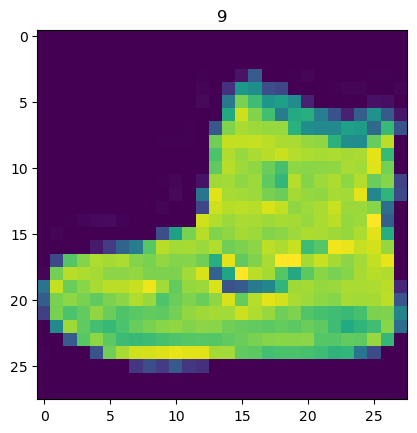

In [17]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.title(label)
plt.imshow(image.squeeze())

In [18]:
image.squeeze().shape

torch.Size([28, 28])

In [23]:
image.min(), image.max()

(tensor(0.), tensor(1.))

In [20]:
# RGB => (244, 244, 244)

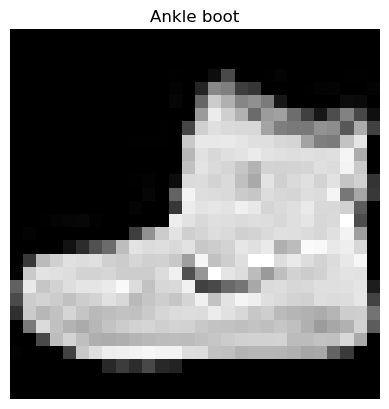

In [24]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_name[label]);
plt.axis(False);

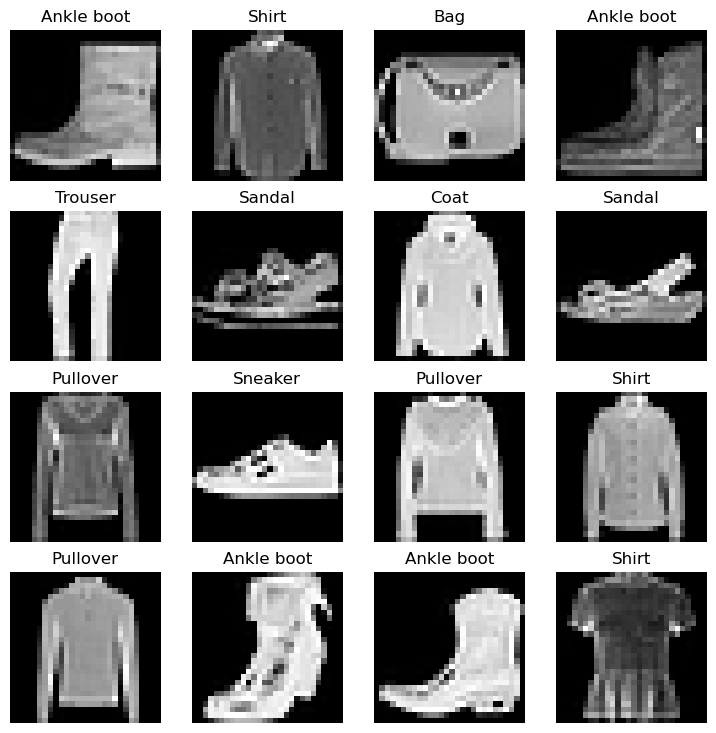

In [25]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap = "gray")
    plt.title(class_name[label])
    plt.axis(False)

## 2. Prepare DataLoader
Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our datasets into a Python iterable.

More specifically, we wnat to turn our data into batches (or mini-batches).

Why would we do t
- It is more computationally efficent, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
- It gives our neural network more chances to update its gradients per epoch.
his?

In [26]:
from torch.utils.data import DataLoader

In [27]:
# Set up the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterable
train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True)

test_dataloader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)

In [28]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1cde6270200>,
 <torch.utils.data.dataloader.DataLoader at 0x1cdfd653500>)

In [29]:
# Let's check our what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)}, batches of {BATCH_SIZE} ...")
print(f"Length of test_dataloader: {len(test_dataloader)}, batches of {BATCH_SIZE} ...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001CDE6270200>, <torch.utils.data.dataloader.DataLoader object at 0x000001CDFD653500>)
Length of train_dataloader: 1875, batches of 32 ...
Length of test_dataloader: 313, batches of 32 ...


In [30]:
60000 / 32 , 10000 / 32 

(1875.0, 312.5)

In [31]:
# Check out what's inside the training dataloader
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

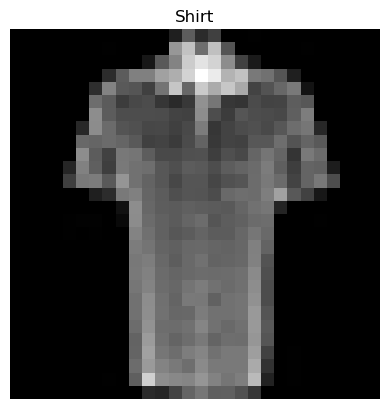

In [33]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_name[label])
plt.axis(False);

## 3. Model 0: Build a baseline model
When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

In [35]:
# Creat a flatten layer
flatten_model = nn.Flatten()

# Get a signle sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print output
print(f"Shape befor flattening: {x.shape} -> [c, h, w]")
print(f"Shape after flattening: {output.shape} -> [c, h * w]")

Shape befor flattening: torch.Size([1, 28, 28]) -> [c, h, w]
Shape after flattening: torch.Size([1, 784]) -> [c, h * w]


In [36]:
class FasionMNISTModelV0(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int, 
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x)

In [37]:
len(class_name)

10

In [38]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FasionMNISTModelV0(input_shape=28 * 28, hidden_units=10, output_shape=len(class_name)).to("cpu")
model_0

FasionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [40]:
dummy_x = torch.rand([1, 1, 28, 28])
logit = model_0(dummy_x)

In [43]:
m = nn.Softmax(dim=1)

In [46]:
m(logit)

tensor([[0.0698, 0.1042, 0.1082, 0.0849, 0.1564, 0.1125, 0.1139, 0.1094, 0.0705,
         0.0703]], grad_fn=<SoftmaxBackward0>)

In [47]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluate metrics

In [48]:
# Import accuracy metric
from helper_functions import accuracy_fn

In [49]:
from tqdm.auto import tqdm

In [50]:
# Setup loss functin and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [51]:
# Set the seed
torch.manual_seed(42)

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-----')
    ### Training
    train_loss = 0
    # Add a loop to through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        #1. Forward pass
        y_pred = model_0(X)
        
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at  {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
            
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)
    
    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)
            
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)
            
            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))
        
        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
        
        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)
    
    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at  0/60000 samples.
Looked at  12800/60000 samples.
Looked at  25600/60000 samples.
Looked at  38400/60000 samples.
Looked at  51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
-----
Looked at  0/60000 samples.
Looked at  12800/60000 samples.
Looked at  25600/60000 samples.
Looked at  38400/60000 samples.
Looked at  51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
-----
Looked at  0/60000 samples.
Looked at  12800/60000 samples.
Looked at  25600/60000 samples.
Looked at  38400/60000 samples.
Looked at  51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265


### 3.2 Make predictions and get Model 0 results

In [52]:
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary the results of model predicting on data_loader."""
    loss, acc = 0, 0
    
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
        # Scale loss and acc to finde the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
        return {"model_name": model.__class__.__name__,
                "model_loss": loss.item(),
                "model_acc": acc}

In [53]:
torch.manual_seed(42)
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FasionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 4. Model 1: Building a better model with non-linearity

In [54]:
# Setup device agnostic-code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [55]:
# Create a model with non-linear and linear layers
class FasionMNISTModelV1(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int, 
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
        
    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)

In [57]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FasionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_name)
                            ).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 4.1 Setup loss, optimizer and evaluation metrics

In [58]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 4.2 Functionizing trianing and evaluation/testing loops

In [59]:
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    ### Training
    train_loss, train_acc = 0, 0
    
    # Put model into training mode
    model.train()
    
    # Add a loop to through the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)
        
        #1. Forward pass
        y_pred = model(X)
        
        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        
                    
    # Divide total train loss by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    # Print out what's happening
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [60]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data_loader."""
    test_loss, test_acc = 0, 0
    
    # Put model in eval mode
    model.eval()
    
    # Turn on inference mode contest manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send the data to the target device
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1))
            
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f} %\n")

In [61]:
torch.manual_seed(42)

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------------")
    
    train_step(model=model_1,
               data_loader=train_dataloader, 
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_1,
               data_loader=test_dataloader, 
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00 %

Epoch: 1
-------------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91 %

Epoch: 2
-------------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02 %



In [62]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    """Returns a dictionary the results of model predicting on data_loader."""
    loss, acc = 0, 0
    
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            
            # Make our data device agnostic
            X, y = X.to(device), y.to(device)
            
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
        # Scale loss and acc to finde the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
        return {"model_name": model.__class__.__name__,
                "model_loss": loss.item(),
                "model_acc": acc}

### 4.3 Make predictions and get Model 1 results

In [63]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [64]:
model_1_results

{'model_name': 'FasionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

## 5. Model 2: Building a Convolutinal Neural Network

CNN's are known for their capabilities to find patterns in visual data: [link](https://poloclub.github.io/cnn-explainer/)

In [65]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            # Create a conv layer
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, 
                      padding=1), # values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # There are trick for calculate
                      out_features=output_shape)
        )
        
    def forward(self, X):
        X = self.conv_block_1(X)
        # print("block1: ",X.shape)
        X = self.conv_block_2(X)
        # print("block2: ",X.shape)
        X = self.classifier(X)
        # print("block_classifier: ",X.shape)
        return X

In [66]:
image.shape

torch.Size([1, 28, 28])

In [67]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_name)).to(device)

In [68]:
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

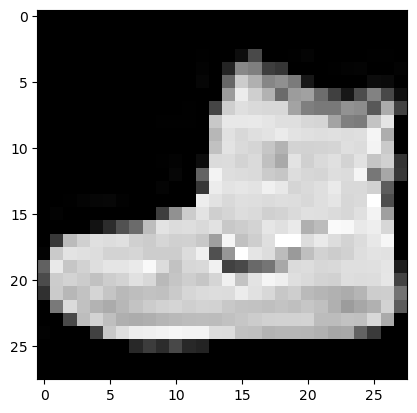

In [69]:
plt.imshow(image.squeeze(), cmap='gray')

In [70]:
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0252, -0.0273,  0.0369,  0.0074, -0.0625,  0.0140,  0.0629, -0.0604,
          0.0271, -0.0400]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 5.1 Stepping through `nn.Conv2d()`

In [71]:
torch.manual_seed(42)

# Create a bathc of images 
images = torch.randn(size = (32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {images.shape}")
print(f"Test image:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([32, 3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [

In [72]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3), 
                       stride=1,
                       padding=1)
# Pass the data through the convolutional layer
conv_out = conv_layer(test_image) # pytorch version lower 1.12 needs test_image.unsqueeze(0)
conv_out.shape

torch.Size([10, 64, 64])

### 5.2 Stepping through `nn.MaxPool2d()`

In [73]:
# Create a sample max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer(): {test_image_through_conv_and_max_pool.shape}")

Shape after going through conv_layer(): torch.Size([10, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 32, 32])


In [74]:
test_image.shape

torch.Size([3, 64, 64])

In [75]:
torch.manual_seed(42)
# Create a random tensor 
random_tensor = torch.randn(size = (1,2,2))
print(f"\nRandom tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
 tensor([[[0.3367, 0.1288],
         [0.2345, 0.2303]]])
Random tensor shape: torch.Size([1, 2, 2])

Max pool tensor:
 tensor([[[0.3367]]])
Max pool tensor shape: torch.Size([1, 1, 1])


### 5.3 Setup a loss function and optimizer

In [77]:
# Set up loss function / eval metrics / optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [78]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.51391 | Train acc: 81.34%
Test loss: 0.36571 | Test acc: 86.70 %

Epoch: 1
-------
Train loss: 0.33507 | Train acc: 88.08%
Test loss: 0.32400 | Test acc: 88.64 %

Epoch: 2
-------
Train loss: 0.29631 | Train acc: 89.45%
Test loss: 0.29014 | Test acc: 89.52 %



In [79]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2901443839073181,
 'model_acc': 89.5167731629393}

## 6. Making a confusion matrix for further prediction evaluation

In [80]:
# !pip install torchmetrics -U mlxtend 
# mlxtend.__version__ needs more than or equal 0.19.0
import mlxtend
from tqdm.auto import tqdm
print(mlxtend.__version__)

0.23.1


In [81]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions... "):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_2(X)
        # Turn predictions form logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        #Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())
        
# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions... :   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 4])

In [82]:
len(y_pred_tensor)

10000

In [83]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [84]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

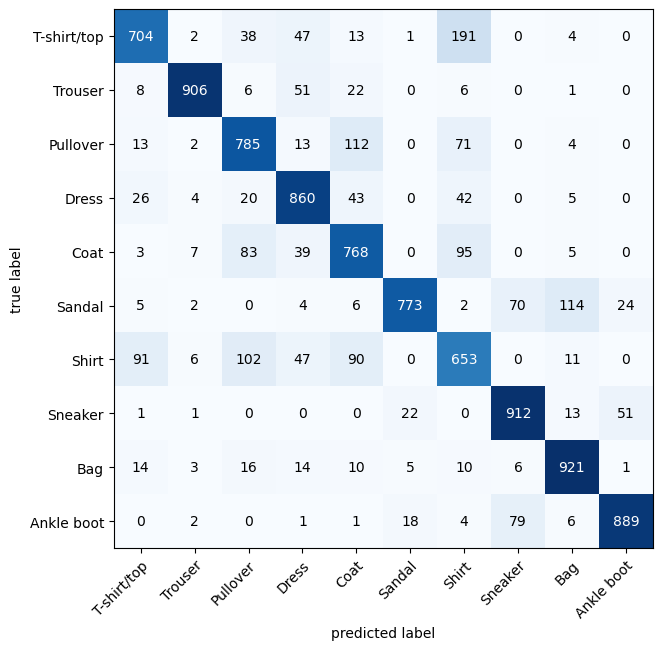

In [85]:
# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_name), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_name,
    figsize=(10, 7)
)